In [ ]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load JSON data
json_data = '''
{
  "Table Number": "1",
  "Title": "Scaman LLE - Time Comparisons",
  "Footer": "Comparison of neighbor matrix creation times (s) in scaman's LLE algorithm.",
  "Groups": [],
  "Headers": [
    "Swis Roll Dimension",
    "sklearn",
    "flann"
  ],
  "Column Widths": [
    100,
    100,
    100
  ],
  "Data": [
    [
      "10,000",
      "0.059",
      "0.031"
    ],
    [
      "100,000",
      "0.841",
      "0.311"
    ],
    [
      "1,000,000",
      "21.993",
      "5.190"
    ],
    [
      "10,000,000",
      "818.618",
      "402.840"
    ]
  ],
  "Style": {
    "Headers": [
      "apa-table-centeralign  ",
      "apa-table-centeralign  ",
      "apa-table-centeralign  "
    ],
    "Data": [
      [
        "apa-table-leftalign",
        "apa-table-centeralign",
        "apa-table-centeralign"
      ],
      [
        "apa-table-leftalign",
        "apa-table-centeralign",
        "apa-table-centeralign"
      ],
      [
        "apa-table-leftalign",
        "apa-table-centeralign",
        "apa-table-centeralign"
      ],
      [
        "apa-table-leftalign",
        "apa-table-centeralign",
        "apa-table-centeralign"
      ]
    ],
    "Groups": []
  }
}
'''

/var/folders/yj/rxsr79ls6fx9ykhgjv_fbk2r0000gp/T/ipykernel_65758/829854194.py:104: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0, 1000])


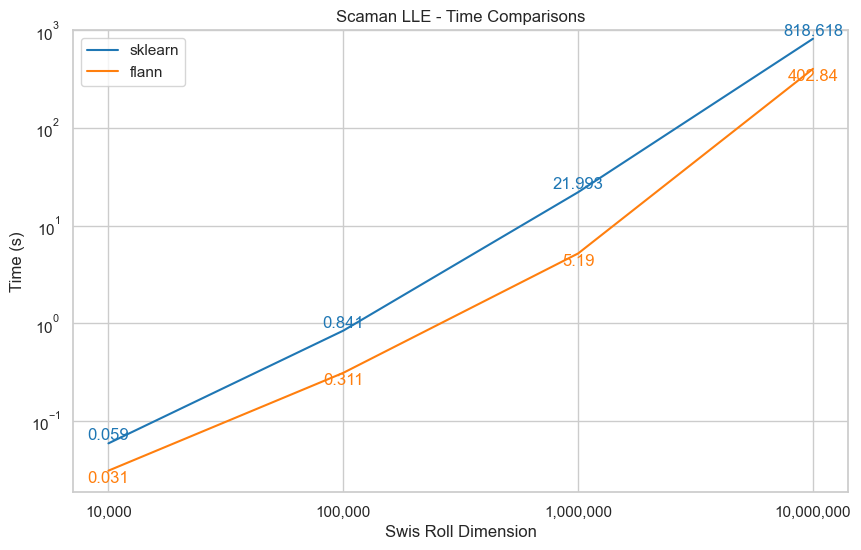

In [11]:

data_dict = json.loads(json_data)
df = pd.DataFrame(data_dict['Data'], columns=data_dict['Headers'])

# Convert numerical columns to float
df['sklearn'] = df['sklearn'].astype(float)
df['flann'] = df['flann'].astype(float)

# Create the plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# APA style colors (example)
colors = ["#1f77b4", "#ff7f0e"]

plt.plot(df['Swis Roll Dimension'], df['sklearn'], color=colors[0], label='sklearn')
plt.plot(df['Swis Roll Dimension'], df['flann'], color=colors[1], label='flann')

#scale the y axis
plt.yscale('log')


plt.title(data_dict['Title'])
plt.xlabel(data_dict['Headers'][0])
plt.ylabel('Time (s)')
plt.legend()

# Set the y-axis limits to [0, 1000]
plt.ylim([0, 1000])

# Add text labels to each data point
for i, row in df.iterrows():
    if row['sklearn'] > row['flann']:
        plt.text(row['Swis Roll Dimension'], row['sklearn'], row['sklearn'], ha='center', va='bottom', color=colors[0])
        plt.text(row['Swis Roll Dimension'], row['flann'], row['flann'], ha='center', va='top', color=colors[1])
    else:
        plt.text(row['Swis Roll Dimension'], row['sklearn'], row['sklearn'], ha='center', va='top', color=colors[0])
        plt.text(row['Swis Roll Dimension'], row['flann'], row['flann'], ha='center', va='bottom', color=colors[1])

# APA style text settings (example)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

plt.show()